# ___________________________________CHURN MODELLING USING PYTHON___

### \\\PART - 1\\\  ( Briefing about data)

##### IMPORTING LIBRARIES REQUIRED :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
import sklearn
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.io import output_file
from bokeh.transform import linear_cmap
from bokeh.util.hex import hexbin

##### READING DATA

In [59]:

df = pd.read_csv("churn modelling.csv")
df.head(10)

,RowNumber,CustomerId,CreditScore,occupation,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,10001,15798485,565,self_employed,Delhi,Male,31,1,0.00,1,0,1,20443.08,0
1,10002,15588959,569,self_employed,Delhi,Male,34,4,0.00,1,0,1,4045.90,0
2,10003,15624896,669,salaried,Delhi,Female,20,7,0.00,2,1,0,128838.67,0
3,10004,15639629,694,self_employed,Delhi,Male,39,4,173255.48,1,1,1,81293.10,0
4,10005,15638852,504,self_employed,Kolkata,Male,28,10,109291.36,1,1,1,187593.15,0
5,10006,15645057,776,self_employed,Delhi,Male,29,4,0.00,2,0,1,88440.83,0
6,10007,15687377,585,retired,Delhi,Male,25,7,159301.00,1,1,1,39824.96,0
7,10008,15795593,651,self_employed,Mumbai,Male,24,5,158484.85,1,1,1,161234.90,0
8,10009,15751848,672,salaried,Delhi,Male,45,7,0.00,2,0,0,174177.96,0
9,10010,15702792,527,self_employed,Delhi,Male,23,8,0.00,2,1,0,76589.04,0


##### CHECKING FOR NULL VALUES :

In [60]:
count = df.isnull().sum()
print(count)

RowNumber          0
CustomerId         0
CreditScore        0
occupation         4
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [61]:
df.dropna(axis=0,inplace=True)
df.drop(['CustomerId'],axis=1,inplace=True)
df.drop(['RowNumber'],axis=1,inplace=True)

##### BRIEF DESCRIPTION ABOUT DATA

In [62]:
df.describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,996.00,996.00,996.00,996.00,996.00,996.00,996.00,996.00,996.00
mean,652.38,39.19,4.86,75147.14,1.52,0.68,0.53,101554.10,0.26
std,97.96,10.73,2.91,62894.31,0.59,0.47,0.50,57873.48,0.44
min,366.00,18.00,0.00,0.00,1.00,0.00,0.00,245.50,0.00
25%,582.00,32.00,2.00,0.00,1.00,0.00,0.00,49099.87,0.00
50%,656.00,37.50,5.00,97926.72,1.00,1.00,1.00,104190.77,0.00
75%,719.00,44.00,7.00,128017.76,2.00,1.00,1.00,151514.42,1.00
max,850.00,91.00,10.00,211520.25,4.00,1.00,1.00,199633.73,1.00


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      996 non-null    int64  
 1   occupation       996 non-null    object 
 2   Geography        996 non-null    object 
 3   Gender           996 non-null    object 
 4   Age              996 non-null    int64  
 5   Tenure           996 non-null    int64  
 6   Balance          996 non-null    float64
 7   NumOfProducts    996 non-null    int64  
 8   HasCrCard        996 non-null    int64  
 9   IsActiveMember   996 non-null    int64  
 10  EstimatedSalary  996 non-null    float64
 11  Exited           996 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 101.2+ KB


### \\\PART - 2\\\   ( Analyzing each parameter)

#### CreditScore

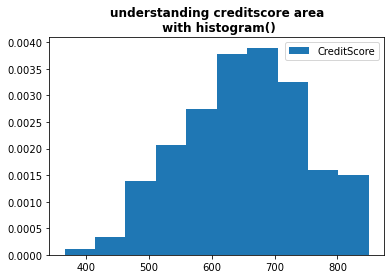

In [14]:
# creditscore vs data
df4=df['CreditScore'].tolist() 
  
plt.hist(df4, density =True,  
         histtype ='bar',
         label='CreditScore') 
  
plt.legend(prop ={'size': 10}) 
  
plt.title('understanding creditscore area\n with histogram()', 
          fontweight ="bold") 
  
plt.show()

#### occupation

In [15]:
# counting distint occupation type
df1=df["occupation"].value_counts()
print(df1)

self_employed    625
salaried         212
retired           81
student           77
company            1
Name: occupation, dtype: int64


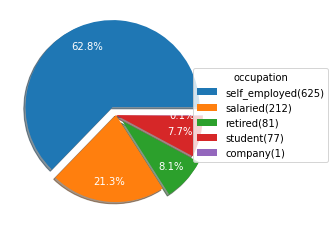

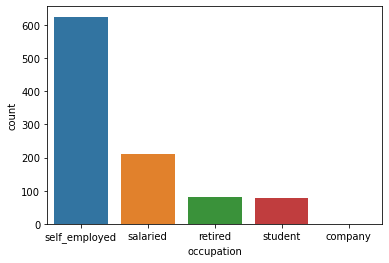

In [17]:
# parameters
occupation = ["625 self_employed(625)",
          "212 salaried(212)",
          "81 retired(81)","77 student(77)", "1 company(1)"]

# accessing elements
data = [float(x.split()[0]) for x in occupation]
type= [x.split()[-1] for x in occupation]

# creating plot
plt.pie(data, autopct='%1.1f%%',pctdistance=0.76, textprops=dict(color="w"),shadow=True,explode=(0.1,0.0,0.1,0.0,0.0))

#adding legend
plt.legend(type,
          title="occupation",
          loc="right", bbox_to_anchor=(1, 0, 0.5, 1))


#showing plot
plt.show()
# count plot
sns.countplot(x='occupation', data=df)

#### Geography

In [18]:
#counting distinct argument
df2=df['Geography'].value_counts()
print(df2)

Delhi      499
Mumbai     255
Kolkata    242
Name: Geography, dtype: int64


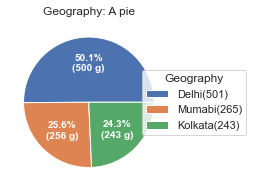

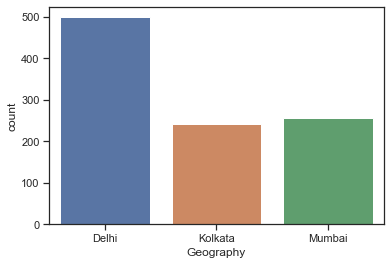

In [21]:
fig, ax = plt.subplots(figsize=(8, 3), subplot_kw=dict(aspect="equal"))
#parameter
Geography = ["501 Delhi(501)",
          "256 Mumabi(265)",
          "243 Kolkata(243)"]

#accessing element
data = [float(x.split()[0]) for x in Geography]
location = [x.split()[-1] for x in Geography]

#creating autocpt argumemnt
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


#creating plot
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct,data),
                                  textprops=dict(color="w"))

#addding legend
ax.legend(wedges,location,
          title="Geography",
          loc="center right",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Geography: A pie")

#showing plot
plt.show()

# count plot
sns.set(style="ticks", color_codes=True)
sns.countplot(x='Geography', data=df)

#### Gender

In [22]:
#counting gender
df6=df['Gender'].value_counts()
df6

Male      565
Female    431
Name: Gender, dtype: int64

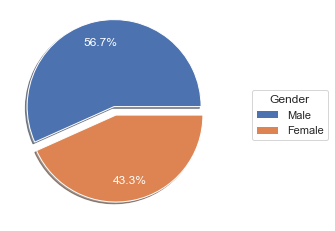

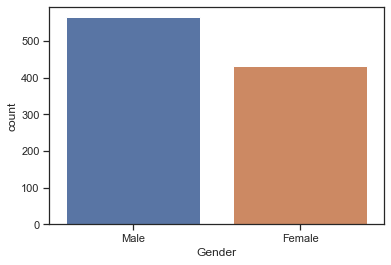

In [23]:
#parameters
Gender=['567 Male','433 Female']

# accessing elements
data1 = [float(x.split()[0]) for x in Gender]
type= [x.split()[-1] for x in Gender]

# creating plot
plt.pie(data1, autopct='%1.1f%%',pctdistance=0.76, textprops=dict(color="w"),shadow=True,explode=(0.1,0.0))

#adding legend
plt.legend(type,
          title="Gender",
          loc="right", bbox_to_anchor=(1, 0, 0.5, 1))


#showing plot
plt.show()
sns.countplot(x='Gender',data=df)

#### Age

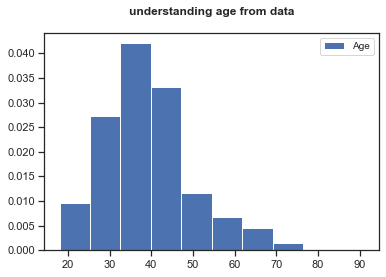

In [24]:
#Age vs data
df3=df['Age'].tolist() 
  
plt.hist(df3, density =True,  
         histtype ='bar',
         label='Age') 
  
plt.legend(prop ={'size': 10}) 
  
plt.title('understanding age from data\n', 
          fontweight ="bold") 
  
plt.show()

#### Balance

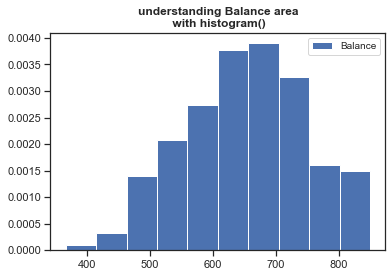

In [25]:
#balance
df5=df['CreditScore'].tolist() 
  
plt.hist(df5, density =True,  
         histtype ='bar',
         label='Balance',) 
  
plt.legend(prop ={'size': 10}) 
  
plt.title('understanding Balance area\n with histogram()', 
          fontweight ="bold") 
  
plt.show()

#### HasCrCard

In [26]:
df7=df['HasCrCard'].value_counts()
df7

1    678
0    318
Name: HasCrCard, dtype: int64

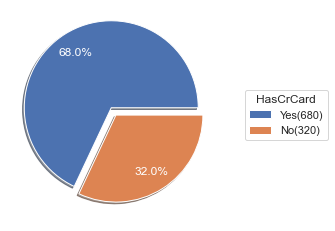

In [27]:
#parameters
HasCrCard=['680 Yes(680)','320 No(320)']

# accessing elements
data1 = [float(x.split()[0]) for x in HasCrCard]
type= [x.split()[-1] for x in HasCrCard]

# creating plot
plt.pie(data1, autopct='%1.1f%%',pctdistance=0.76, textprops=dict(color="w"),shadow=True,explode=(0.1,0.0))

#adding legend
plt.legend(type,
          title="HasCrCard",
          loc="right", bbox_to_anchor=(1, 0, 0.5, 1))


#showing plot
plt.show()

#### IsActiveMember

In [28]:
df8=df['IsActiveMember'].value_counts()
df8

1    528
0    468
Name: IsActiveMember, dtype: int64

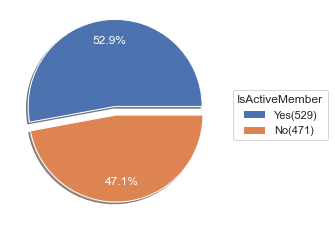

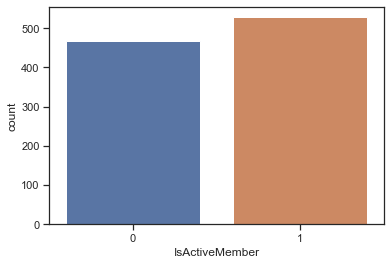

In [29]:
#preparing data
IsActiveMember=['529 Yes(529)','471 No(471)']
# accessing elements
data1 = [float(x.split()[0]) for x in IsActiveMember]
type= [x.split()[-1] for x in IsActiveMember]

# creating plot
plt.pie(data1, autopct='%1.1f%%',pctdistance=0.76, textprops=dict(color="w"),shadow=True,explode=(0.1,0.0))

#adding legend
plt.legend(type,
          title="IsActiveMember",
          loc="right", bbox_to_anchor=(1, 0, 0.5, 1))


#showing plot
plt.show()
#count plot
sns.countplot(x='IsActiveMember',data=df)

#### Estimated Salary

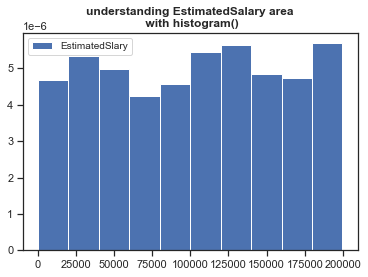

In [30]:
df5=df['EstimatedSalary'].tolist() 
  
plt.hist(df5, density =True,  
         histtype ='bar',
         label='EstimatedSlary',) 
  
plt.legend(prop ={'size': 10}) 
  
plt.title('understanding EstimatedSalary area\n with histogram()', 
          fontweight ="bold") 
  
plt.show()

#### Exited

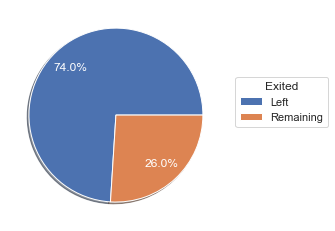

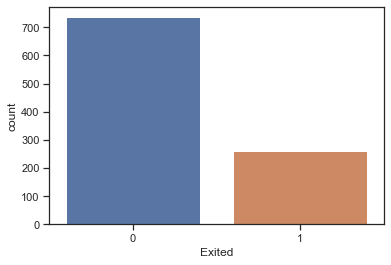

In [31]:
#counting
df9=df['Exited'].value_counts()
df9
#preparing Data
Exited=['740 Left','260 Remaining']
# accessing elements
data1 = [float(x.split()[0]) for x in Exited]
type= [x.split()[-1] for x in Exited]
# creating plotting
plt.pie(data1,autopct='%1.1f%%',pctdistance=0.76,shadow=True,textprops=dict(color='w'))
plt.legend(type,title='Exited',loc='upper right',bbox_to_anchor=(1,0,0.5,0.7))
plt.show()
# count plot
sns.countplot(x='Exited',data=df)

### \\\PART - 3\\\

### extra

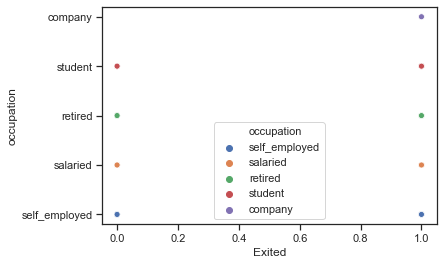

In [32]:
# exited vs credit score
ds=sns.scatterplot(x='Exited',y='occupation',hue='occupation',data=df)
sns.title='exited vs creditscore'
ds

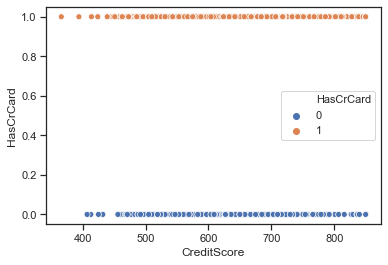

In [33]:
#sns.boxplot(y='Exited',x='occupation',data=df)
sns.scatterplot(x='CreditScore',y='HasCrCard',hue='HasCrCard',data=df)

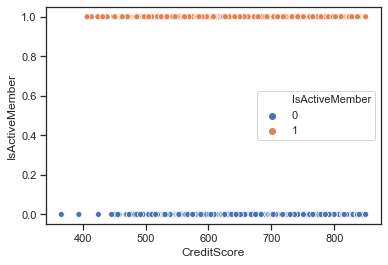

In [34]:
#creditscore vs isactivemember
sns.scatterplot(x='CreditScore',y='IsActiveMember',hue='IsActiveMember',data=df)

In [40]:
# Age vs Balance hold
x=df['Age']
y=df['Balance']
output_notebook()
#colors=['#%02x%02x%02x'%(int(r),int(g),150) for r,g in zip(np.floor(50+2*x), np.floor(30+2*x))]
p=figure()
p.scatter(x,y,radius=3, fill_color='x', fill_alpha=0.3, line_color='green')
show(p)

Loading BokehJS ...

In [37]:
# Age vs NumOfProduct availed
x=df['Age']
y=df['NumOfProducts']
# output to static HTML file
output_notebook()

p = figure(plot_width=400, plot_height=400)

# add a circle renderer with a size, color, and alpha
p.circle(x,y,size=10, color="navy", alpha=0.2)
p

# show the results
show(p)

Loading BokehJS ...

In [38]:
# customer holding credit card are active or not
x=df['HasCrCard']
y=df['IsActiveMember']

bins = hexbin(x, y, 0.1)

p = figure(tools="wheel_zoom,reset", match_aspect=True, background_fill_color='#440154')
p.grid.visible = False

p.hex_tile(q="q", r="r", size=1.06, line_color=None, source=bins,
           fill_color=linear_cmap('counts', 'Viridis256', 0, max(bins.counts)))

output_notebook()

show(p)

Loading BokehJS ...

In [39]:
# creditscore vs balance
x=df['CreditScore']
y=df['Balance']
output_notebook()
p = figure(plot_width=400, plot_height=400)

p.circle(x,y, size=5)

show(p)

Loading BokehJS ...